# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_content = btc_response.content
current_btc_price = btc_response.json()

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_content = eth_response.content
current_eth_price = eth_response.json()

# Compute current value of my crpto
btc_price = current_btc_price["data"]["1"]["quotes"]["USD"]["price"]
eth_price = current_eth_price["data"]["1027"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24201.60
The current value of your 5.3 ETH is $5881.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
load_dotenv()
api_key = ("PKYTM2NXV24OV9IZREAJ")
api_secret = "nsS0lYYane3EB5Ug0xIpdZaNG7S5qMw016R34LGv"

# Create the Alpaca API object
base_url = 'https://paper-api.alpaca.markets'
api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')
account = api.get_account()

In [8]:
# Format current date as ISO format
today =  pd.Timestamp("2022-07-08", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
agg_spy = api.get_bars(
    tickers, timeframe, start = today, end = today
).df
# Reorganize the DataFrame
# Separate ticker data
agg = agg_spy[agg_spy["symbol"]=="AGG"].drop(["open", "high", "low", "volume", "trade_count", "vwap", "symbol"], axis = 1)

spy = agg_spy[agg_spy["symbol"]=="SPY"].drop(["open", "high", "low", "volume", "trade_count", "vwap", "symbol"], axis = 1)


# Concatenate the ticker DataFrames
combined_df = pd.concat([agg, spy], axis="columns", join="inner", keys = ["agg", "spy"])

# Preview DataFrame
combined_df

,agg,spy
,close,close
timestamp,,
2022-07-08 04:00:00+00:00,101.23,388.67


In [9]:
# Pick AGG and SPY close prices
agg_close = combined_df['agg']['close'][0]
spy_close =combined_df['spy']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $101.23
Current SPY closing price: $388.67


In [10]:
agg_current_value = agg_close * my_agg
spy_current_value = spy_close * my_spy

# Print current value of shares
print(f"The current value of  {my_spy} SPY shares is ${spy_current_value:0.2f}")
print(f"The current value of  {my_agg} AGG shares is ${agg_current_value:0.2f}")

The current value of  50 SPY shares is $19433.50
The current value of  200 AGG shares is $20246.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly = 12000

# Consolidate financial assets data
financial_assets = [my_btc_value + my_eth_value,  spy_current_value + agg_current_value]
financial_assets

# Create savings DataFrame
df_savings = pd.DataFrame(data = financial_assets, index = ["crypto", "stocks"], columns = ["total"])
df_savings_total = (my_btc_value + my_eth_value) + (spy_current_value + agg_current_value)
display(df_savings_total)

# Display savings DataFrame
display(df_savings)

69762.722

,total
crypto,30083.222
stocks,39679.500


<AxesSubplot:ylabel='total'>

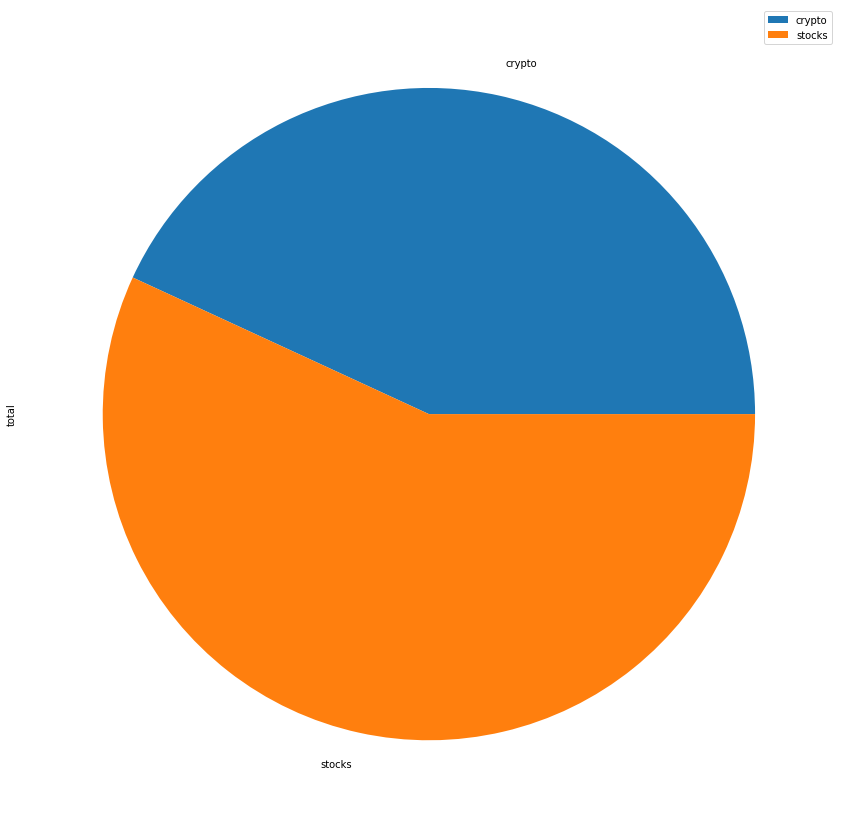

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="total", figsize = (30, 15))

In [13]:
# Set ideal emergency fund
#For this we always assume an emergency fund is equal to 6 months of gross income, which in this situation is $12,000 per month
emergency_fund = monthly * 6

# Calculate total amount of savings
emergency_fund

# Validate saving health

if (df_savings_total > emergency_fund ):
    print("Savings is healthy!")
elif (df_savings_total < emergency_fund):
    print("You need to save more for a rainy day")


You need to save more for a rainy day


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2017-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
agg_spy_five_df = api.get_bars(
    tickers, timeframe, start = start_date, end = end_date
).df


AGG = agg_spy_five_df[agg_spy_five_df['symbol']=="AGG"].drop((['symbol']), axis = 1)

SPY = agg_spy_five_df[agg_spy_five_df['symbol']=="SPY"].drop((['symbol']), axis = 1)
AGG
SPY

# Concatenate the ticker DataFrames
combined_five_df = pd.concat([AGG, SPY], axis=1, keys = ['AGG', 'SPY'])

# Preview DataFrame
combined_five_df.head()


                           

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-07-03 04:00:00+00:00        7321  109.130388  242.90  243.38  242.2100   
2017-07-05 04:00:00+00:00       12388  109.122387  242.61  243.01  241.7000   
2017-07-06 04:00:00+00:00       10712  108.928442  241.86  242.03  240.3400   
2017-07-07 04:00:00+00:00        9963  108.889505  241.18  242.28  240.5645   
2017-07-10 04:00:00+00:00        9654  108.953151  241.98  242.80  241.7600   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-07-03 04:00:00+00:00  242.21  39153806      134045  242.802969  
2017-07-05 04:00:00+00:00  242.77  54427596      184987  242.525892  
2017-07-06 04:00:00+00:00  240.55  66115317      243341  241.125448  
2017-07-07 04:00:00+00:00  242.11  57972268      170407  241.801297  
2017-07-10 04:00:00+00:00  242.37  36663274      138842  242.377829

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 30 

In [17]:
# Printing the simulation input data
MC_portfolio = MCSimulation(portfolio_data = combined_five_df,
                           weights = [.60, .40],
                           num_simulation = num_sims,
                           num_trading_days = 252 * 3
                          )
MC_portfolio.portfolio_data.head() 

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-03 04:00:00+00:00        7321  109.130388          NaN  242.90   
2017-07-05 04:00:00+00:00       12388  109.122387     0.000550  242.61   
2017-07-06 04:00:00+00:00       10712  108.928442    -0.001924  241.86   
2017-07-07 04:00:00+00:00        9963  108.889505    -0.000367  241.18   
2017-07-10 04:00:00+00:00        9654  108.953151     0.000459  241.98   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-07-03 04:00:00+00:00  243.38  242.2100  242.21  39153806      134045   
2017-07-05 04:00:00+00:00  243.01  241.7000  242.77  54427596      184987   
2017-07-06 04:00:00+00:00  242.03  240.3400  240.55  66115317      243341   
2017-07-07 04:00:00+00:00  242.28  240.5645  242.11  57972268      170407   
2017-07-10 04:00:00+00:00  242.80  241.7600  242.37  36663274      138842   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-03 04:00:00+00:00  242.802969          NaN  
2017-07-05 04:00:00+00:00  242.525892     0.002312  
2017-07-06 04:00:00+00:00  241.125448    -0.009144  
2017-07-07 04:00:00+00:00  241.801297     0.006485  
2017-07-10 04:00:00+00:00  242.377829     0.001074

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992822,1.000584,1.006094,1.001679,1.002856,1.003232,0.986615,0.997687,0.999646,1.007054,...,1.013928,0.991319,0.998341,1.003806,0.989315,1.008720,0.997649,0.998653,0.999761,0.995386
2,0.997088,1.006200,1.009851,1.001674,1.007894,1.005096,0.982959,0.998770,0.995481,1.020394,...,1.010193,0.985921,0.998019,1.005377,0.994186,1.005682,1.002208,0.996376,0.999431,0.995147
3,1.000242,1.009926,1.021241,1.011755,1.007518,1.010372,0.980051,1.001657,0.993106,1.017389,...,1.024359,0.987872,1.004434,0.987419,0.981328,1.007814,0.992466,0.996153,0.994482,0.999629
4,0.997460,1.011069,1.022436,1.017367,1.005262,1.006805,0.976015,0.992868,0.989339,1.018984,...,1.027138,0.998502,0.994947,0.976242,0.975772,1.004707,0.991841,0.994365,0.990201,1.011033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.237169,1.206652,1.030039,1.247839,1.200098,1.042391,1.282124,0.921320,1.084541,1.042804,...,1.103062,1.155218,0.949961,1.234167,0.923514,1.339642,0.973947,1.316605,1.211965,1.554148
753,1.247500,1.191182,1.026766,1.252802,1.212111,1.044218,1.294520,0.916040,1.085480,1.034359,...,1.108578,1.149223,0.938896,1.235688,0.921171,1.338143,0.983495,1.311331,1.213117,1.537690
754,1.243454,1.193090,1.022967,1.252505,1.218442,1.053077,1.282227,0.913372,1.090284,1.036503,...,1.109292,1.155530,0.937761,1.232838,0.932866,1.330705,0.987711,1.308834,1.218511,1.534641
755,1.243076,1.184872,1.023657,1.253031,1.222964,1.060453,1.294723,0.913931,1.080609,1.040924,...,1.112193,1.160690,0.942302,1.236413,0.925180,1.335905,0.989432,1.305976,1.211456,1.524368


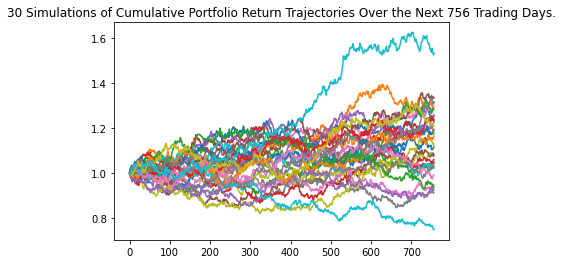

In [19]:
# Plot simulation outcomes
MC_portfolio_line_plot_30year =  MC_portfolio.plot_simulation()

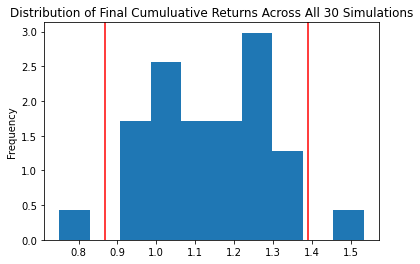

In [20]:
# Plot probability distribution and confidence intervals
MC_portfolio_dist_plot_30year = MC_portfolio.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_portfolio_summary_stats_30year = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(MC_portfolio_summary_stats_30year)

count           30.000000
mean             1.136075
std              0.162441
min              0.750921
25%              1.034921
50%              1.146322
75%              1.247618
max              1.533014
95% CI Lower     0.866983
95% CI Upper     1.389937
Name: 756, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment_new = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_portfolio_summary_stats_30year[8] * initial_investment_new
ci_upper = MC_portfolio_summary_stats_30year[9] * initial_investment_new

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17339.660672535072 and $27798.739524441487


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = MC_portfolio_summary_stats_30year[8] * initial_investment
ci_upper = MC_portfolio_summary_stats_30year[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26009.491008802608 and $41698.10928666223


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [30]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
#print

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")